<a href="https://colab.research.google.com/github/dileep-rawat/Capstone_Project-4-Netflix_Movie_and_TV_Shows-Clustering/blob/main/Netflix_Movie_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movie and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

### <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features
5. At the end build Content Based Recommendation System.

Write the summary here within 500-600 words.

# **GitHub Link** -

https://github.com/dileep-rawat/Capstone_Project-4-Netflix_Movie_and_TV_Shows-Clustering

# **Problem Statement**


<b>This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [ ]:
# Load Dataset
netflix_df = pd.read_csv('https://raw.githubusercontent.com/dileep-rawat/Capstone_Project-4-Netflix_Movie_and_TV_Shows-Clustering/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'number of rows : {netflix_df.shape[0]}  \nnumber of columns : {netflix_df.shape[1]}')

number of rows : 7787  
number of columns : 12


### Dataset Information

In [ ]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
netflix_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# Missing Values Percentage
round(netflix_df.isna().sum()/netflix_df.shape[0]*100, 2).sort_values(ascending=False).head(5)

director      30.68
cast           9.22
country        6.51
date_added     0.13
rating         0.09
dtype: float64

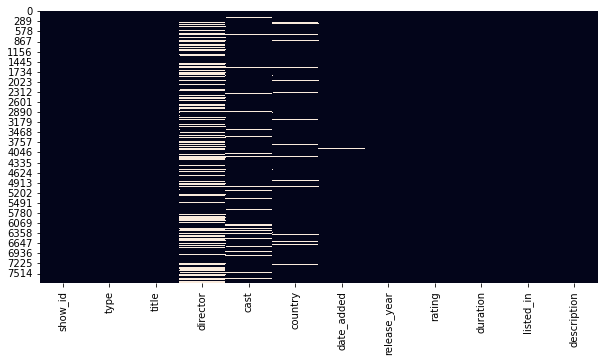

In [ ]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(netflix_df.isnull(), cbar=False)

### What did you know about your dataset?

NaN values present in the director, cast, country, date_added and rating column. 

All the data that we have is related to each specific movie. So, we can't impute any null values with using any method. Also we don't want to loose any data since the data size is small for that reason we simply impute nan values with empty space in below procedure analyzing each columns.  

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
netflix_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description 

- **show_id** : Unique ID for every Movie/Show
- **type** : Identifier - Movie/Show
- **title** : Title of the Movie/Show
- **director** : Director of the Movie/Show
- **cast** : Actors involved in the Movie/Show
- **country** : Country where the Movie/Show was produced
- **date_added** : Date it was added on Netflix
- **release_year** : Actual Release year of the Movie/Show
- **rating** : TV Rating of the Movie/Show
- **duration** : Total Duration - in minutes or number of seasons
- **listed_in** : Genre
- **description**: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in netflix_df.columns.tolist():
  print("No. of unique values in ",i,"is",netflix_df[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


- **After analysing dataset we are more focusing toward 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description' columns and these column carry a lots of information.**
- **We are building our model on the top of mentioned features where those feature are used to create one cluster column to implement K-means, Hierarchical clustering and building content based recommandation system as well.**

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Exploratory Data Analysis (EDA) is the very first step before you can perform any changes to the dataset or develop a statistical model to answer business problems. In other words, the process of EDA contains summarizing, visualizing and getting deeply acquainted with the important traits of a data set.

## **4.1. Univatiate Analysis:**

#### **type Column Value Counts**

Movie      5377
TV Show    2410
Name: type, dtype: int64
 


Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

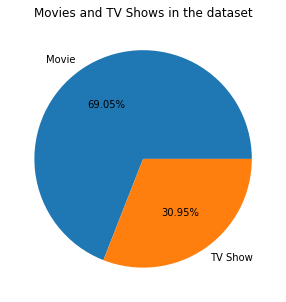

In [ ]:
# type Column Value Counts
print(netflix_df.type.value_counts())
print(" ")

# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(10,5))
netflix_df['type'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

**Analysis from above graph.**
1. **Greater number of count belong from movie class than Tv show class.**  
2. **There are more movies (69.05%) than TV shows (30.95%)  in the dataset.**

#### **Title column**

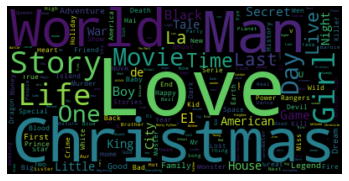

In [ ]:
# text documents
text = " ".join(word for word in netflix_df['title'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

**Analysis from above graph.**
1. **The words like Christmas, Love, World, Man and  Story are very comman word which are appear most in movie title column.**  

#### **Director column**

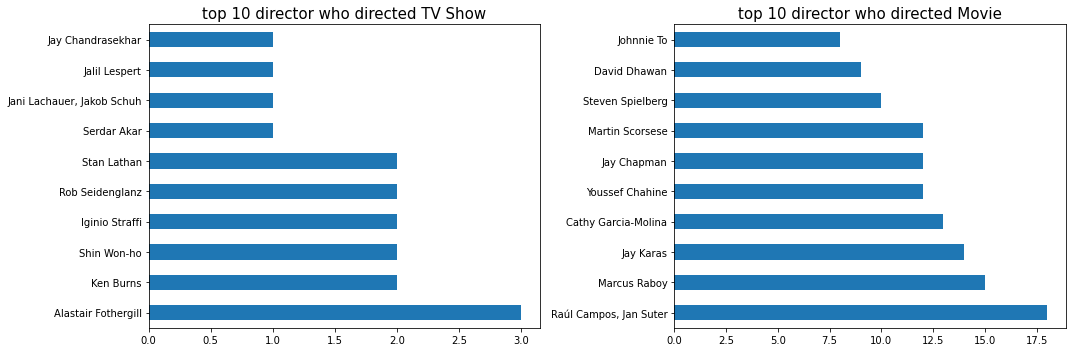

In [ ]:
#defing fig size and axis
fig,ax = plt.subplots(1,2, figsize=(15,5))

# top 10 director who directed TV show
show = netflix_df[netflix_df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
show.set_title('top 10 director who directed TV Show', size=15)

# top 10 director who directed movie
movie = netflix_df[netflix_df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movie.set_title('top 10 director who directed Movie', size=15)

plt.tight_layout()
plt.show()

**Analysis from above graph.**
1. **Alastair Fothergill has directed three TV shows, the most of any director.**
2. **Raul Campos and Jan Suter have togather directed in 18 movies, higher than anyone yet.**
3. **This is followed by Marcus Roboy, Jay Karas, and Cathy Gracia-Molina**


#### cast

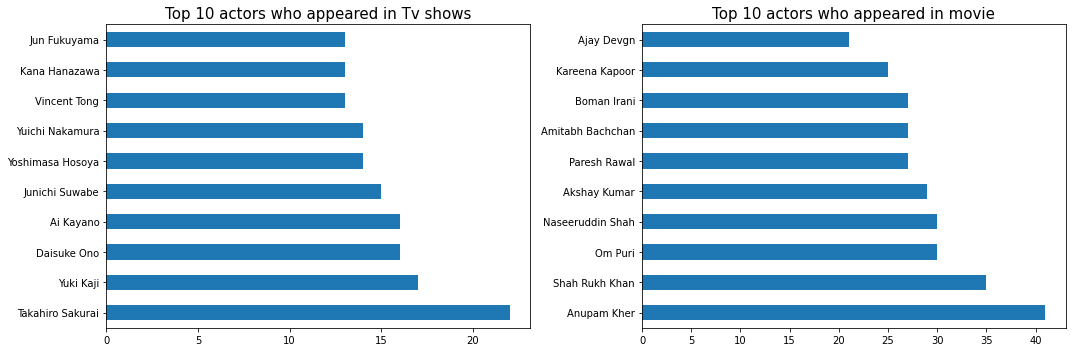

In [ ]:
#defing fig size and axis
fig,ax = plt.subplots(1,2, figsize=(15,5))

# top 10 TV shows actor 
TV_shows = netflix_df[netflix_df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[0])
TV_shows.set_title('Top 10 actors who appeared in Tv shows', size=15)

# top 10 Movie actor 
movies = netflix_df[netflix_df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('Top 10 actors who appeared in movie', size=15)

plt.tight_layout()
plt.show()

**Analysis from above graph.**
1. **Takahiro Sakurai, Yuki Kaji and Daisuke Ono played highest role in the TV shows.**
2. **Anupam Kher, Shahrukh Khan and Om Puri played highest number of role in the movies.**

#### **Country**

Text(0.5, 1.0, 'Top 10 countries with the highest number of movies / TV shows')

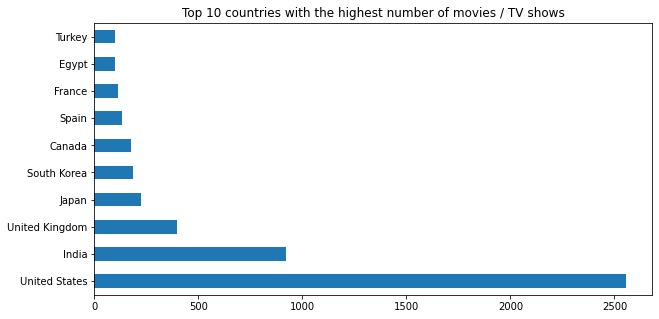

In [ ]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
netflix_df.country.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 countries with the highest number of movies / TV shows')

**Analysis from above graph.**
1. **The highest number of movies / TV shows were based out of the US, followed by India and UK.**

date_added

#### **Distribution by relase year**

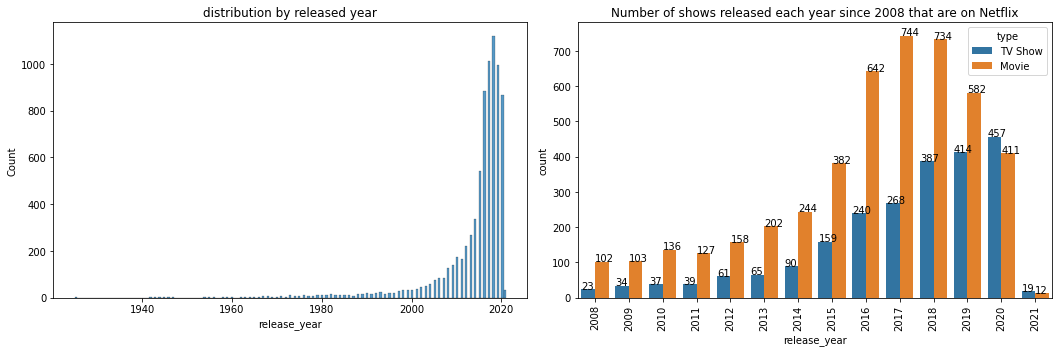

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Univariate analysis
hist = sns.histplot(netflix_df['release_year'], ax=ax[0])
hist.set_title('distribution by released year')

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=netflix_df, order=range(2008,2022), ax=ax[1])
count.set_title('Number of shows released each year since 2008 that are on Netflix')
plt.xticks(rotation=90)
for p in count.patches:  #adding value count on the top of bar
   count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

**Analysis from above graph.**
1. **Netflix has greater number of new movies / TV shows than the old ones.**
2. **Over the years, Netflix has consistently focused on adding more shows in its platform.**
3. **Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.**
4. **This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.**

#### **Rating**

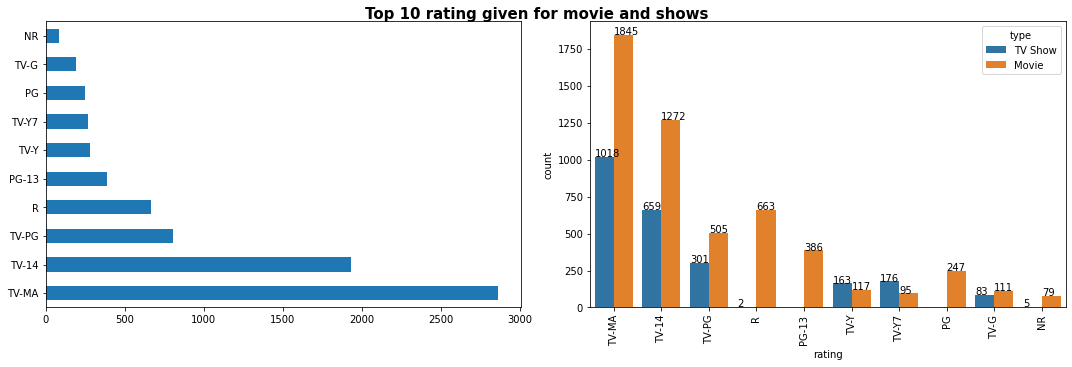

In [ ]:
# Top 10 Rating 
fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', size=15, y=1.01)

# univariate analysis
netflix_df['rating'].value_counts()[:10].plot(kind='barh',ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=netflix_df, hue='type', order=netflix_df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

**Analysis from above graph.**
1. **most of the movie and tv shows have rating of TV-MA (Mature Audiance) then followed by TV-14 (younger audiance).**



#### duration

#### **Listed in** 

Text(0.5, 1.0, 'Top 10 genres')

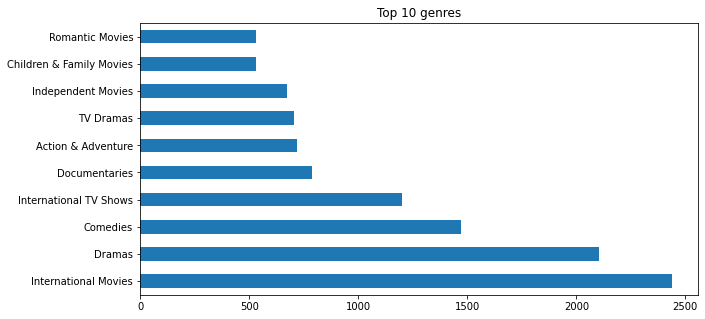

In [ ]:
# seperating genre from listed_in columns for analysis purpose
genres = netflix_df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# top 10 genre in listed movie/show
plt.figure(figsize=(10,5))
genres = genres.value_counts()[:10].plot(kind='barh')
plt.title('Top 10 genres')

**Analysis from above graph.**
1. **The International movie is the most popular genre followed by dramas and comedies.**

#### **Description**

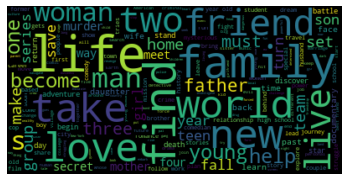

In [ ]:
# text documents
text = " ".join(word for word in netflix_df['description'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

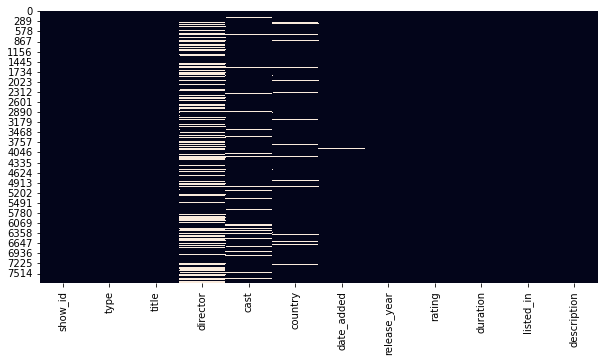

In [ ]:
# Handling Missing Values & Missing Value Imputation
plt.figure(figsize=(10,5))
sns.heatmap(netflix_df.isnull(), cbar=False)

In [ ]:
# Missing Data %
round(netflix_df.isna().mean().sort_values(ascending=False)*100,2)

director        30.68
cast             9.22
country          6.51
date_added       0.13
rating           0.09
show_id          0.00
type             0.00
title            0.00
release_year     0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

- The missing values in the director, cast, and country attributes can be replaced with 'empty string'
- Small amount of null value percentage is present in rating and date_added column and if we drop these nan values it will not affect that much while building the model.

In [ ]:
# Handling Missing Values & Missing Value Imputation
netflix_df[['director','cast','country']] = netflix_df[['director','cast','country']].fillna(' ')
netflix_df.dropna(axis=0, inplace=True)

In [ ]:
# checking for null values after treating them.
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

We have successfully handled all the missing values in the dataset.

### 2. Handling Outliers

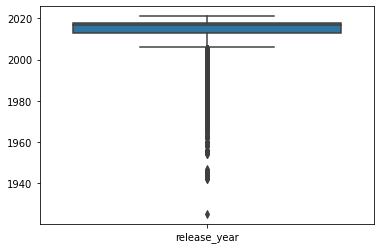

In [ ]:
# Handling Outliers & Outlier treatments
sns.boxplot(data=netflix_df)

- Since, the almost all of the data present in textual format except release year.
- The data that we need to create cluster/building model are present in textual foramat. So, there is no need to perform handling outlier.

## 4. Textual Data Preprocessing 
**Modeling Approach**
1. Select the attributes based on which you want to cluster the shows
2. Text preprocessing: Remove all stopwords and punctuation marks, convert all textual data to lowercase.
3. Stemming to generate a meaningful word out of corpus of words.
4. Tokenization of corpus and Word vectorization
5. Dimensionality reduction
6. Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques
7. Build optimal number of clusters and visualize the contents of each cluster using wordclouds.

#### **6.1. Clustering Attributes**

We will cluster the movie/shows on Netflix based on the following attributes:

- Director
- Cast
- Country
- Rating
- Listed in (genres)
- Description

In [ ]:
# Using the original dataset for clustering since
# it does not require handling missing values
df1 = netflix_df.copy()

In [ ]:
# creating clustering_attributes column using all text column which one is used for model building purpose.
df1['clustering_attributes'] = df1['description'] + df1['listed_in'] + df1['rating'] + df1['cast'] + df1['country'] + df1['director']

In [ ]:
df1.clustering_attributes[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazil '

* **We have successfully added all the necessary data into a single column**

#### **6.2. Removing non-ASCII characters:**

In [ ]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])

In [ ]:
df1.clustering_attributes[0]

#### **6.3. Removing stopwords and lower case::**

In [ ]:
# download the stop words list if it is not already downloaded
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

In [ ]:
df1['clustering_attributes'][0]

'future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.international tv shows, tv dramas, tv sci-fi & fantasytv-majoão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschibrazil'

* **We have successfully removed all the stopwords and converted the corpus to lowercase.**

#### **6.3. Removing stopwords and lower case::**

Removing punctuation is a common pre-processing step in natural language processing (NLP) tasks. Punctuation marks like periods, commas, and exclamation points can add noise to the data and can sometimes be treated as separate tokens, which can affect the performance of NLP models.

In [ ]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    # replacing the punctuations with no space, which deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuation marks
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)

In [ ]:
df1['clustering_attributes'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorinternational tv shows tv dramas tv scifi  fantasytvmajoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil'

* **We have successfully dropped all the punctuation marks from the corpus.**

#### **6.3. Stemming:**

Stemming operation bundles together words of same root. e.g. stem operation bundles "response" and "respond" into a common "respon" 

Used **SnowballStemmer** to generate a meaningful word out of corpus of words.

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
#performing stemming operation
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stemming)

In [ ]:
df1['clustering_attributes'][0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalorintern tv show tv drama tv scifi fantasytvmajoão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil'

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***